In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import math

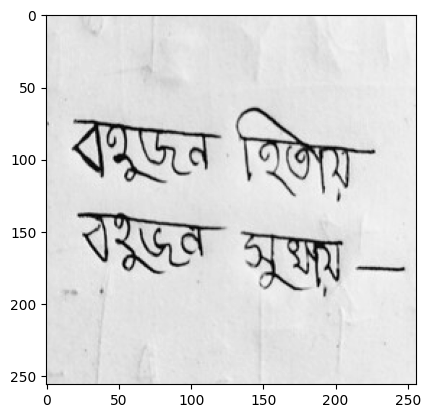

In [5]:
img = cv2.imread('test.jpg',0)
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
def basic_global_thresholding(img,deltheshold):
    initial_mean = np.mean(img)
    while(True):
        pre_mean = initial_mean
        background = []
        foreground = []
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(img[i][j] > initial_mean):
                    foreground.append(img[i][j])
                else:
                    background.append(img[i][j])
        mean_back = np.mean(background)
        mean_fore = np.mean(foreground)
        initial_mean = (mean_back + mean_fore)/2
        if(abs(initial_mean - pre_mean) <= deltheshold):
            break
    return math.ceil(initial_mean)

In [7]:
def segmented_image(img,threshold):
    bin_image = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(threshold<img[i][j]):
                bin_image[i][j] = 1

    return bin_image 

In [8]:
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

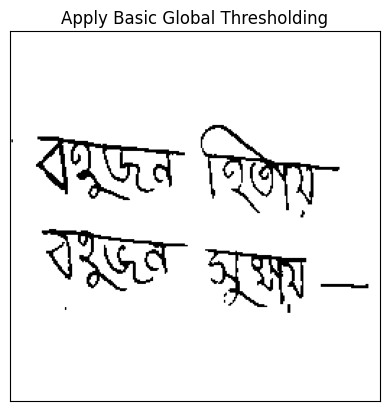

In [9]:
plt.imshow(seg1, cmap='gray')
plt.title("Apply Basic Global Thresholding")
plt.xticks([])
plt.yticks([])
plt.show()

# Apply Morphological Operations 

### 1. Apply Errosion


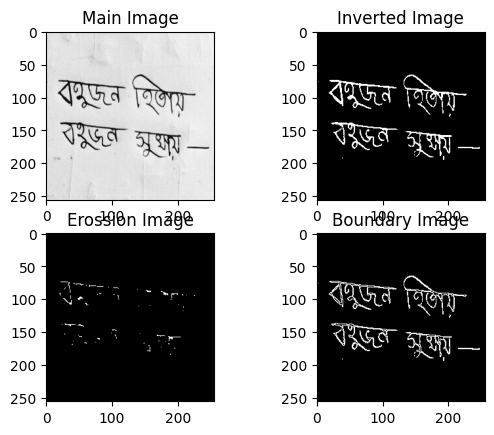

In [17]:
kernel = np.ones((3, 3), np.uint8)
invert = cv2.bitwise_not(seg1)
erosion = cv2.erode(invert, kernel,iterations=1)
boundary=invert-erosion
plt.subplot(2,2,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.title("Inverted Image")
plt.imshow(invert, cmap='gray')
plt.subplot(2,2,3)
plt.title("Erossion Image")
plt.imshow(erosion, cmap='gray')
plt.subplot(2,2,4)
plt.title("Boundary Image")
plt.imshow(boundary, cmap='gray')
plt.show()

### 2. Apply Dialation

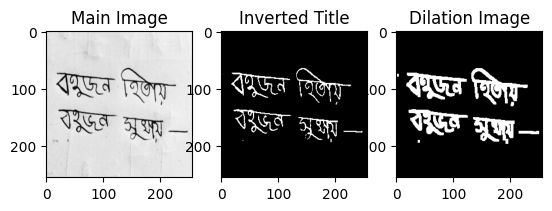

In [20]:
img = cv2.imread('test.jpg',0)
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

kernel = np.ones((2, 2), np.uint8)
invert = cv2.bitwise_not(seg1)
dilation = cv2.dilate(invert, kernel, iterations=3)
plt.subplot(1,3,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title('Inverted Title')
plt.imshow(invert, cmap='gray')
plt.subplot(1,3,3)
plt.title('Dilation Image')
plt.imshow(dilation, cmap='gray')
plt.show()

### 3. Apply Opening 

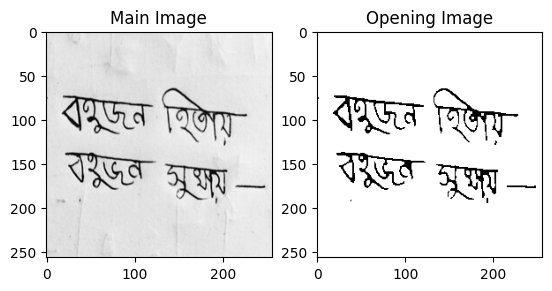

In [46]:
img = cv2.imread('test.jpg',0)
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(seg1, cv2.MORPH_OPEN,kernel, iterations=1)



plt.subplot(1,2,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Opening Image")
plt.imshow(opening, cmap='gray')
plt.show()



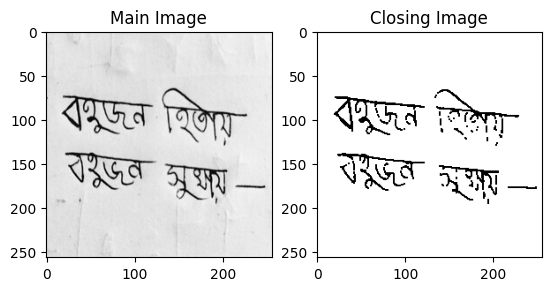

In [52]:
img = cv2.imread('test.jpg',0)
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(seg1, cv2.MORPH_CLOSE, kernel, iterations=1)
 
plt.subplot(1,2,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Closing Image")
plt.imshow(closing, cmap='gray')
plt.show()


### Apply Boundary Detection 

In [54]:
img = cv2.imread('Test1.jpg',0)
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

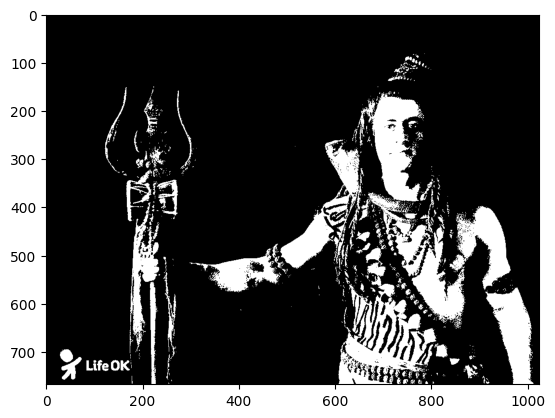

In [55]:
plt.imshow(seg1, cmap='gray')
plt.show()

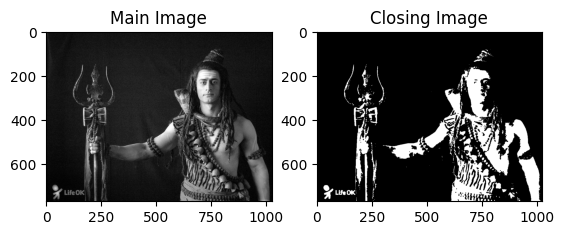

In [62]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(seg1, cv2.MORPH_CLOSE, kernel, iterations=1)
 
plt.subplot(1,2,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Closing Image")
plt.imshow(closing, cmap='gray')
plt.show()

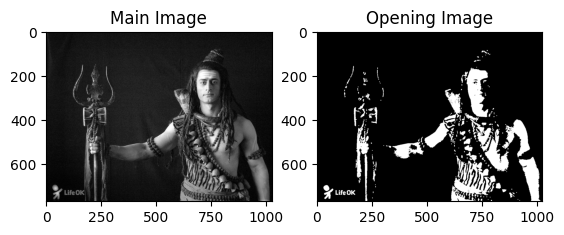

In [59]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(seg1, cv2.MORPH_OPEN,kernel, iterations=1)



plt.subplot(1,2,1)
plt.title("Main Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Opening Image")
plt.imshow(opening, cmap='gray')
plt.show()


In [67]:
invert = cv2.bitwise_not(seg1)
dilation = cv2.dilate(invert, kernel, iterations=3)
Boundary = cv2.bitwise_and(seg1, cv2.bitwise_not(dilation))

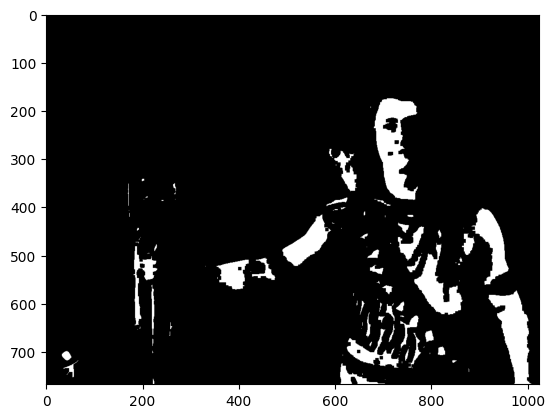

In [68]:
plt.imshow(Boundary, cmap='gray')
plt.show()

# User Define 

In [76]:
def Errossion(img,r,c):
    r = int(r)
    c = int(c)
    kernel = np.ones((r, c), np.uint8)
    res = np.zeros_like(img)
    pad_height = r // 2
    pad_width = c // 2

    padded_image = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            if(kernel[1][1] == img[i][j] and kernel[0][0] == img[i-1][j-1] and kernel[2][2] == img[i+1][j+1] and kernel[0][1] == img[i-1][j] and kernel[0][2] == img[i][j+2] and kernel[2][0] == img[i+2][j] and kernel[1][0] == img[i+1][j]):
                res[i][j] = 1
    return res , padded_image
                        
        
        
    

In [77]:
img = cv2.imread('splash.tiff',0)
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)
invert = cv2.bitwise_not(seg1)
res , i= Errossion(invert, 3 ,3)

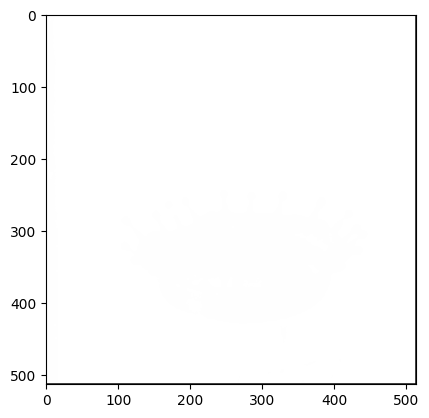

In [78]:
plt.imshow(i, cmap='gray')
plt.show()